In [1]:
using Plots
using Flux
using StaticArrays

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Info: CUDAdrv.jl failed to initialize, GPU functionality unavailable (set JULIA_CUDA_SILENT or JULIA_CUDA_VERBOSE to silence or expand this message)
└ @ CUDAdrv /home/zach/.julia/packages/CUDAdrv/b1mvw/src/CUDAdrv.jl:67
┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1273


In [2]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.00*randn(n);

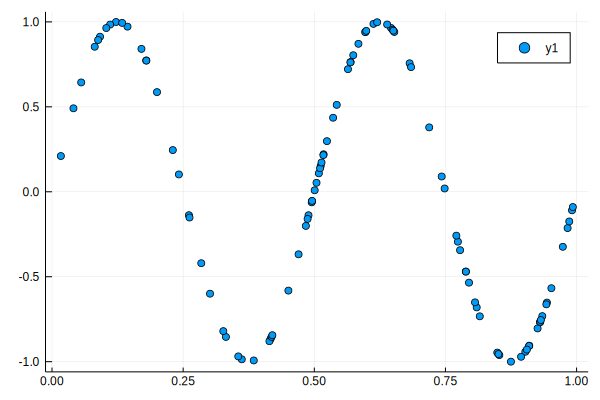

In [3]:
scatter(dx, dy)

In [37]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(Dense(1, 50, σ), Dense(50, 50, σ), Dense(50, 1))

In [31]:
loss(x, y) = Flux.mse(m(x), y)

loss (generic function with 1 method)

In [32]:
ps = Flux.params(m)

Params([Float32[0.3224491; -0.12808438; … ; -0.071087755; 0.29303965], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.16349047 -0.041807026 … 0.213413 0.17552498; -0.07553535 0.2213079 … -0.24232498 -0.18392406; … ; -0.15895884 -0.23880543 … 0.10652703 -0.063147694; -0.1628326 0.19676363 … 0.22793302 0.08349678], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.12089847 0.012995085 … -0.13664854 0.1841148], Float32[0.0]])

In [33]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Array{Tuple{SArray{Tuple{1},Float64,1,1},SArray{Tuple{1},Float64,1,1}},1}:
 ([0.5240781948477282], [0.29797971221165376])  
 ([0.5086567281964667], [0.10856922622270981])  
 ([0.9022705315414663], [-0.9418536356811275])  
 ([0.4955423219659145], [-0.05598754311441473]) 
 ([0.6463042299007362], [0.9643773721316767])   
 ([0.5974779789857618], [0.9407869959419677])   
 ([0.7484533826885227], [0.019434142793007647]) 
 ([0.5971881035126736], [0.9395458938490352])   
 ([0.09150423049783463], [0.9127133107173809])  
 ([0.41664335303962985], [-0.8661718504556919]) 
 ([0.26100049278399373], [-0.13779642412061277])
 ([0.6525239706587946], [0.9407786902168521])   
 ([0.612787791120335], [0.9882476240408584])    
 ⋮                                              
 ([0.48390263533104005], [-0.2009087034903569]) 
 ([0.931917961407396], [-0.7549278720221827])   
 ([0.38458746827909107], [-0.9927510981276177]) 
 ([0.9052224580630048], [-0.9287437655604079])  
 ([0.7889463641460766], [-0.470

1000

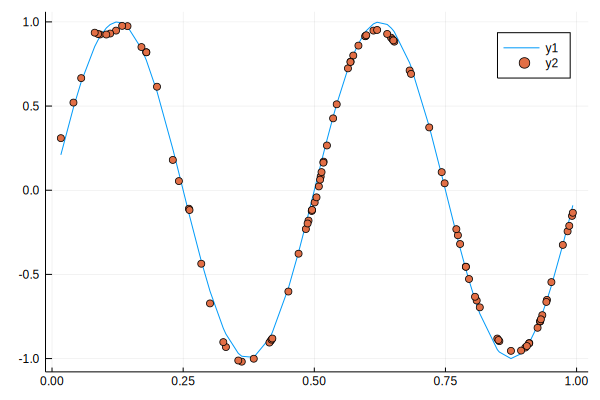

In [34]:
for i in 1:1000
    Flux.train!(loss, ps, data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)))
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)])
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

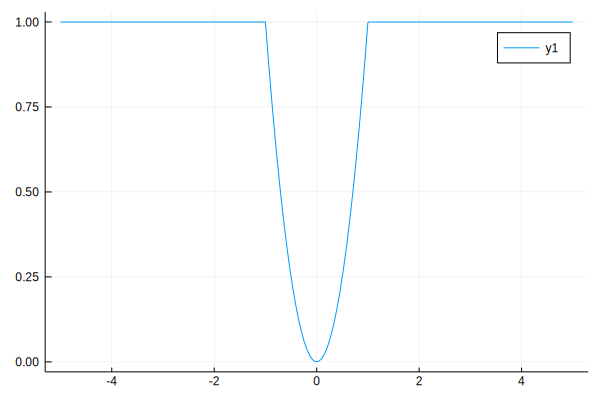

In [29]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [30]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(Dense(1, 50, mynl), Dense(50, 50, mynl), Dense(50, 1))